##  Part IV: Machine Learning - Prediction Model | Jupyter Notebook

## Final Project Submission

Please fill out:
* __Student name:__ Sharonda Pettiett-Warner
* __Student pace:__ part time - PT_0610
* __Scheduled project review date/time:__ April 24, 2020
* __Instructor name:__ Eli Thomas

## Problem Statement

> __Question:__ Can we accurately predict if a customer will cancel a hotel booking reservtions?
- __Goal:__
To build model to predict bookings cancellation likelihood.

# Begin Study
> In this notebook I will perform Machine Learning Analysis to __build the prediction model__.   This study will examine the hotel booking dataset from a kernel in Kaggle. The objective is to build a model to predict bookings cancellation likelihood.

In [1]:
import datetime
start = datetime.datetime.now()

### Import Libraries

In [2]:
import numpy as np 
import pandas as pd 

import pickle

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import auc, classification_report,  confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Imputer

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)

#### Import Functions

In [4]:
# ./module_ml.py file contains the following function(s): print_metrics(labels, preds) - used to Print Performance Metrics
import module_ml as m_ml   

### Load Dataset
> The __hotel_booking_clean.csv__ is derived from the pre-processing and feature engineering tasks in the following jupyter notebook, entitled, __Capstone_ML_Model - (Baseline and FeatEngr)__.

In [5]:
dataset = pd.read_csv('./hotel_booking_clean.csv')
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,No Deposit,304.0,0,Transient,75.0,0,0,2015-07-02
1,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,No Deposit,240.0,0,Transient,98.0,0,1,2015-07-03
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,No Deposit,240.0,0,Transient,98.0,0,1,2015-07-03
3,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,No Deposit,303.0,0,Transient,103.0,0,1,2015-07-03
4,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,No Deposit,240.0,0,Transient,82.0,0,1,2015-05-06


In [6]:
dataset.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
102889,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,No Deposit,394.0,0,Transient,96.14,0,0,2017-09-06
102890,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,No Deposit,9.0,0,Transient,225.43,0,2,2017-09-07
102891,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,No Deposit,9.0,0,Transient,157.71,0,4,2017-09-07
102892,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,No Deposit,89.0,0,Transient,104.40,0,0,2017-09-07
102893,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,No Deposit,9.0,0,Transient,151.20,0,2,2017-09-07


In [7]:
dataset.shape

(102894, 29)

# EDA
> Analysis performed in __Capstone_EDA__  jupyter notebook.

# Data Cleaning
> Analysis performed in __Capstone_ML_Model - (Baseline and FeatEngr)__  jupyter notebook.

#### Copy Raw Dataset

In [8]:
# Copy raw dataset to new dataframe for furter processing
df = dataset.copy()

#### Change Data type

In [9]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102894 entries, 0 to 102893
Data columns (total 29 columns):
hotel                             102894 non-null object
is_canceled                       102894 non-null int64
lead_time                         102894 non-null int64
arrival_date_year                 102894 non-null int64
arrival_date_month                102894 non-null object
arrival_date_week_number          102894 non-null int64
arrival_date_day_of_month         102894 non-null int64
stays_in_weekend_nights           102894 non-null int64
stays_in_week_nights              102894 non-null int64
adults                            102894 non-null int64
children                          102894 non-null float64
babies                            102894 non-null int64
meal                              102894 non-null object
country                           102894 non-null object
market_segment                    102894 non-null object
distribution_channel              102894 n

In [11]:
# Check for null values in the data
df.isnull().any().any()

False

# Feature Engineering

#### One-hot Encoding

In [12]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,hotel_Resort Hotel,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_FB,meal_HB,meal_SC,meal_Undefined,country_AGO,country_AIA,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_ASM,country_ATA,country_ATF,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BEN,country_BFA,country_BGD,country_BGR,country_BHR,country_BHS,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_BWA,country_CAF,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_COM,country_CPV,country_CRI,country_CUB,country_CYM,country_CYP,country_CZE,country_DEU,country_DJI,country_DMA,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FJI,country_FRA,country_FRO,country_GAB,country_GBR,country_GEO,country_GGY,country_GHA,country_GIB,country_GLP,country_GNB,country_GRC,country_GTM,country_GUY,country_HKG,country_HND,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KHM,country_KIR,country_KNA,country_KOR,country_KWT,country_LAO,country_LBN,country_LBY,country_LCA,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDV,country_MEX,country_MKD,country_MLI,country_MLT,country_MMR,country_MNE,country_MOZ,country_MRT,country_MUS,country_MWI,country_MYS,country_MYT,country_NAM,country_NCL,country_NGA,country_NIC,country_NLD,country_NOR,country_NPL,country_NZL,country_OMN,country_PAK,country_PAN,country_PER,country_PHL,country_PLW,country_POL,country_PRI,country_PRT,country_PRY,country_PYF,country_QAT,country_ROU,country_RUS,country_RWA,country_SAU,country_SDN,country_SEN,country_SGP,country_SLE,country_SLV,country_SRB,country_SUR,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_TGO,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,304.0,0,75.0,0,0,2015-07-02,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,240.0,0,98.

In [13]:
df.shape

(102894, 238)

In [14]:
list(df.columns)

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'agent',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status_date',
 'hotel_Resort Hotel',
 'arrival_date_month_August',
 'arrival_date_month_December',
 'arrival_date_month_February',
 'arrival_date_month_January',
 'arrival_date_month_July',
 'arrival_date_month_June',
 'arrival_date_month_March',
 'arrival_date_month_May',
 'arrival_date_month_November',
 'arrival_date_month_October',
 'arrival_date_month_September',
 'meal_FB',
 'meal_HB',
 'meal_SC',
 'meal_Undefined',
 'country_AGO',
 'country_AIA',
 'country_ALB',
 'country_AND',
 'country_ARE',
 'country_ARG',
 'country_ARM',
 'country_ASM',
 'country_ATA',
 'country_ATF',
 'country_AUS

#### Observations: Feature Engineering 
- Implemented one-hot-encoding (ohe) on 11 categorical columns in the dataset.

#### Evaluate correlation with vaiables

In [15]:
df.corr()['is_canceled'].abs().sort_values(ascending = False)

is_canceled                      1.000000
deposit_type_Non Refund          0.461937
country_PRT                      0.374549
lead_time                        0.277666
total_of_special_requests        0.257934
market_segment_Groups            0.218866
required_car_parking_spaces      0.188298
customer_type_Transient          0.141870
country_FRA                      0.131060
customer_type_Transient-Party    0.129008
assigned_room_type_D             0.125338
country_GBR                      0.122868
country_DEU                      0.120235
previous_cancellations           0.117983
hotel_Resort Hotel               0.116237
market_segment_Direct            0.113175
distribution_channel_Direct      0.108642
distribution_channel_TA/TO       0.105387
agent                            0.081939
country_ESP                      0.067190
assigned_room_type_E             0.060163
market_segment_Offline TA/TO     0.058531
country_NLD                      0.055488
reserved_room_type_D             0

# Most Predictive Features
From our analysis, we concluded that the most useful features for prediction were the following features (Top 15):

- lead_time                        0.116716
- deposit_type_Non Refund          0.108665
- country_PRT                      0.080293
- adr                              0.078294
- total_of_special_requests        0.069174
- arrival_date_day_of_month        0.056989
- agent                            0.051549
- arrival_date_week_number         0.048732
- stays_in_week_nights             0.037315
- previous_cancellations           0.030105
- stays_in_weekend_nights          0.025514
- arrival_date_year                0.024081
- required_car_parking_spaces      0.020868
- market_segment_Online TA         0.020407
- customer_type_Transient          0.019232

In [16]:
# Most Predictive Features
import_feats = [
'lead_time',
'deposit_type_Non Refund',
'country_PRT',
'adr',
'total_of_special_requests',
'arrival_date_day_of_month',
'agent',
'arrival_date_week_number',
'stays_in_week_nights',
'previous_cancellations',
'stays_in_weekend_nights',
'arrival_date_year',
'required_car_parking_spaces',
'market_segment_Online TA',
'customer_type_Transient']

# Create Train, Test Splits

#### Create X,y variables

In [17]:
# Create X, y vars for further processing
y = df['is_canceled']
X = df.loc[:,import_feats]

In [18]:
X.tail()

,lead_time,deposit_type_Non Refund,country_PRT,adr,total_of_special_requests,arrival_date_day_of_month,agent,arrival_date_week_number,stays_in_week_nights,previous_cancellations,stays_in_weekend_nights,arrival_date_year,required_car_parking_spaces,market_segment_Online TA,customer_type_Transient
102889,23,0,0,96.14,0,30,394.0,35,5,0,2,2017,0,0,1
102890,102,0,0,225.43,2,31,9.0,35,5,0,2,2017,0,1,1
102891,34,0,0,157.71,4,31,9.0,35,5,0,2,2017,0,1,1
102892,109,0,0,104.40,0,31,89.0,35,5,0,2,2017,0,1,1
102893,205,0,0,151.20,2,29,9.0,35,7,0,2,2017,0,1,1


In [19]:
y.tail()

102889    0
102890    0
102891    0
102892    0
102893    0
Name: is_canceled, dtype: int64

#### Create train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [21]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(72025, 15) (72025,) (30869, 15) (30869,)


### Re-run Algorithm(s) - Determine Best Performing Model

In [22]:
import importlib
importlib.reload(m_ml)

<module 'module_ml' from 'C:\\Data_Science\\FlatIron_DS_Bootcamp\\Projects\\Capstone\\Final\\module_ml.py'>

LogRegress	 Test Accuracy Score: 0.787198 	 Train Accuracy Score: 0.787574

Null Accuracy:
0    0.607762
Name: is_canceled, dtype: float64

cohen_kappa_score: 
 0.5362287746522563 

matthews_corrcoef: 
 0.5452578550313154 

*_roc_auc_score: 
 0.7580356733608035 

The classifier made a total of 30869 predictions.

The classifier predicted guests booked the hotel 21328 times, and canceled 9541 times.
Actually, 18761 guests booked the hotel and 12108 guests canceled.
_________ 

Confusion Matrix Metrics: TP = 7540 | TN = 16760 | FP = 2001 | FN = 4568 


[[16760  2001]
 [ 4568  7540]]

Number of Type I Errors: 2001
Number of Type II Errors: 4568


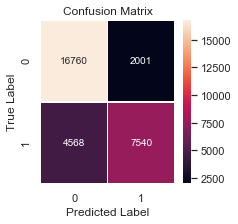

Classification Report:
                      precision    recall  f1-score   support

is_not_canceled (0)       0.79      0.89      0.84     18761
    is_canceled (1)       0.79      0.62      0.70     12108

          micro avg       0.79      0.79      0.79     30869
          macro avg       0.79      0.76      0.77     30869
       weighted avg       0.79      0.79      0.78     30869


Precision Score: 0.790273556231003
Specificity: 0.8933425723575502
Recall Score: 0.6227287743640568
Accuracy Score: 0.7871975120671224
F1 Score: 0.6965679708069658
Misclassification Rate: 0.2128024879328776
_________ 

Among 30869 observations our model is predicting 9541 canceled. 
In actual,  12108 have canceled and among those, the model identified 7540 correctly.

True  Positive: 7540.  The model has predicted the positive (1) case, correctly.
True  Negative: 16760.  The model has predicted the negative case (0), correctly.
False Positive: 2001.  The model has predicted these customers would can

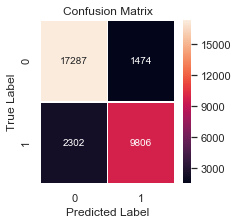

Classification Report:
                      precision    recall  f1-score   support

is_not_canceled (0)       0.88      0.92      0.90     18761
    is_canceled (1)       0.87      0.81      0.84     12108

          micro avg       0.88      0.88      0.88     30869
          macro avg       0.88      0.87      0.87     30869
       weighted avg       0.88      0.88      0.88     30869


Precision Score: 0.8693262411347518
Specificity: 0.9214327594477907
Recall Score: 0.8098777667657747
Accuracy Score: 0.8776766335158249
F1 Score: 0.8385496835984266
Misclassification Rate: 0.12232336648417508
_________ 

Among 30869 observations our model is predicting 11280 canceled. 
In actual,  12108 have canceled and among those, the model identified 9806 correctly.

True  Positive: 9806.  The model has predicted the positive (1) case, correctly.
True  Negative: 17287.  The model has predicted the negative case (0), correctly.
False Positive: 1474.  The model has predicted these customers would 

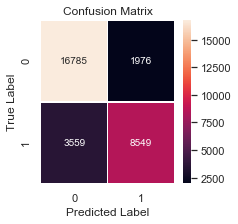

Classification Report:
                      precision    recall  f1-score   support

is_not_canceled (0)       0.83      0.89      0.86     18761
    is_canceled (1)       0.81      0.71      0.76     12108

          micro avg       0.82      0.82      0.82     30869
          macro avg       0.82      0.80      0.81     30869
       weighted avg       0.82      0.82      0.82     30869


Precision Score: 0.8122565320665083
Specificity: 0.894675123927296
Recall Score: 0.7060621076973902
Accuracy Score: 0.8206939000291554
F1 Score: 0.7554455883002695
Misclassification Rate: 0.17930609997084457
_________ 

Among 30869 observations our model is predicting 10525 canceled. 
In actual,  12108 have canceled and among those, the model identified 8549 correctly.

True  Positive: 8549.  The model has predicted the positive (1) case, correctly.
True  Negative: 16785.  The model has predicted the negative case (0), correctly.
False Positive: 1976.  The model has predicted these customers would c

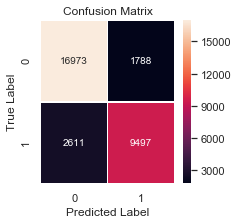

Classification Report:
                      precision    recall  f1-score   support

is_not_canceled (0)       0.87      0.90      0.89     18761
    is_canceled (1)       0.84      0.78      0.81     12108

          micro avg       0.86      0.86      0.86     30869
          macro avg       0.85      0.84      0.85     30869
       weighted avg       0.86      0.86      0.86     30869


Precision Score: 0.8415595923792645
Specificity: 0.904695911731784
Recall Score: 0.7843574496200859
Accuracy Score: 0.8574945738443098
F1 Score: 0.8119522934211089
Misclassification Rate: 0.14250542615569017
_________ 

Among 30869 observations our model is predicting 11285 canceled. 
In actual,  12108 have canceled and among those, the model identified 9497 correctly.

True  Positive: 9497.  The model has predicted the positive (1) case, correctly.
True  Negative: 16973.  The model has predicted the negative case (0), correctly.
False Positive: 1788.  The model has predicted these customers would c

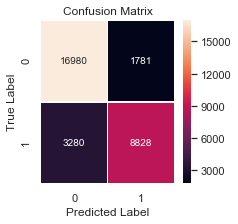

Classification Report:
                      precision    recall  f1-score   support

is_not_canceled (0)       0.84      0.91      0.87     18761
    is_canceled (1)       0.83      0.73      0.78     12108

          micro avg       0.84      0.84      0.84     30869
          macro avg       0.84      0.82      0.82     30869
       weighted avg       0.84      0.84      0.83     30869


Precision Score: 0.8321236685832784
Specificity: 0.9050690261713128
Recall Score: 0.7291047241493228
Accuracy Score: 0.836049110758366
F1 Score: 0.777215301316195
Misclassification Rate: 0.16395088924163403
_________ 

Among 30869 observations our model is predicting 10609 canceled. 
In actual,  12108 have canceled and among those, the model identified 8828 correctly.

True  Positive: 8828.  The model has predicted the positive (1) case, correctly.
True  Negative: 16980.  The model has predicted the negative case (0), correctly.
False Positive: 1781.  The model has predicted these customers would ca

In [23]:
# Re-run models to determine the best performing model

pipe_logRegr = Pipeline([('rs', RobustScaler()),
        ('clf', LogisticRegression())])

pipe_rf = Pipeline([('rs', RobustScaler()),
        #('clf', RandomForestClassifier(random_state = 42))])
         ('clf', RandomForestClassifier(criterion='gini', max_depth=20, n_estimators=1000, n_jobs=-1, random_state = 42))])

pipe_ab = Pipeline([('rs', RobustScaler()),
        ('clf', AdaBoostClassifier(random_state = 42))])

pipe_gb = Pipeline([('rs', RobustScaler()),
        #('clf', GradientBoostingClassifier(random_state = 42))])
        ('clf', GradientBoostingClassifier(learning_rate=0.01, max_depth=6, n_estimators=1000, random_state = 42))])

pipe_xgb = Pipeline([('rs', RobustScaler()),
        ('clf', XGBClassifier(random_state = 42))])

# List of pipelines, List of pipeline names
pipelines = [pipe_logRegr, pipe_rf, pipe_ab, pipe_gb, pipe_xgb]
pipeline_names = ['LogRegress', 'RandomForestClf', 'AdaBoostClf','GradBoostClf','XGBClassifier' ]
scoring_results = []

# Loop to fit each of the pipelines in the named list
for index, pipe in enumerate(pipelines):
    #print(pipe)
    pipe.fit(X_train, y_train)
    
    # Fit using grid search
    model = pipe.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Pickle training object
    dir = './Pickle_Files/'
    outfile = str(dir+pipeline_names[index]+'.pickle')
    save_clf = open(outfile, 'wb')
    pickle.dump(model, save_clf)
    save_clf.close()
    
    # Compare Test and Train Accuracy Scores
    print(f'{pipeline_names[index]}\t Test Accuracy Score: {round(pipe.score(X_test, y_test),6)} \t Train Accuracy Score: {round(pipe.score(X_train, y_train),6)}\n')
    scoring_results.append(round(pipe.score(X_test, y_test),6))
    
    # Null Accuracy
    y_test.value_counts()/len(y_test)
    print(f'Null Accuracy:\n{y_test.value_counts().head(1)/len(y_test)}\n')
    
    # cohen_kappa_score
    print(f'cohen_kappa_score: \n {cohen_kappa_score(y_test, y_pred)} \n')
    
    # matthews_corrcoef
    print(f'matthews_corrcoef: \n {matthews_corrcoef(y_test, y_pred)} \n')
    
    # roc_auc_score
    print(f'*_roc_auc_score: \n {roc_auc_score(y_test, y_pred)} \n')
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    TP = cm[1,1]  # True Positives
    TN = cm[0,0]  # True Negatives
    FP = cm[0,1]  # False Positves - Type I Errors
    FN = cm[1,0]  # False Negatives - Type II Errors
    num_pred = len(y_pred)
    
    print(f'The classifier made a total of {num_pred} predictions.\n')
    print(f'The classifier predicted guests booked the hotel {TN+FN} times, and canceled {TP+FP} times.')
    print(f'Actually, {TN+FP} guests booked the hotel and {TP+FN} guests canceled.')
    print(f'_________ \n')
    print(f'Confusion Matrix Metrics: TP = {TP} | TN = {TN} | FP = {FP} | FN = {FN} \n')
    print(f'\n{cm}\n')  # Print confusion matrix
    print(f'Number of Type I Errors: {FP}')
    print(f'Number of Type II Errors: {FN}')
    
    f, ax = plt.subplots(figsize =(3,3))
    sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="white",fmt = ".0f",ax=ax)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    target_names = ['is_not_canceled (0)', 'is_canceled (1)'] 
    print(f'Classification Report:\n {classification_report(y_test, y_pred, target_names=target_names)}\n')
    m_ml.print_metrics(y_test, y_pred, TN, TP, FN, FP, num_pred)
    print(f'################################################################################# \n')

final_scoring_results = list(zip(pipeline_names, scoring_results))
final_scoring_results = pd.DataFrame(final_scoring_results, columns=['Classifier','Acc Score (test)'])

#### Observations: Determine Best Performing Model


In [24]:
final_scoring_results = pd.DataFrame(final_scoring_results)
final_scoring_results.columns = ['Classifier','Acc Score (test)']
final_scoring_results

,Classifier,Acc Score (test)
0,LogRegress,0.787198
1,RandomForestClf,0.877677
2,AdaBoostClf,0.820694
3,GradBoostClf,0.857495
4,XGBClassifier,0.836049


> __RandomForestClf__ model worked the best out of all of our models giving the highest accuracy scores:
- RandomForestClf:	 __Test Accuracy Score: 0.877677 	 Train Accuracy Score: 0.939452__
- False Negatives (__Type II__) have higher counts than those of other miss-classifications.

# Test Single Prediction

## De-Pickle Best Performing Model 
> Use for single prediction testing

In [25]:
# De-pickle the best performing model for testing
import pickle
clf_file = open('./Pickle_Files/RandomForestClf.pickle', 'rb')
model = pickle.load(clf_file)
clf_file.close()

In [26]:
X_train.head(10)

,lead_time,deposit_type_Non Refund,country_PRT,adr,total_of_special_requests,arrival_date_day_of_month,agent,arrival_date_week_number,stays_in_week_nights,previous_cancellations,stays_in_weekend_nights,arrival_date_year,required_car_parking_spaces,market_segment_Online TA,customer_type_Transient
3874,56,0,1,110.00,0,24,250.0,13,3,0,0,2016,0,0,1
96734,121,0,0,85.00,0,26,28.0,21,2,0,1,2017,0,0,1
41332,96,0,0,180.30,0,28,9.0,18,3,0,0,2016,0,1,1
11374,208,0,0,206.00,2,5,240.0,31,7,0,4,2017,0,1,1
56047,34,0,0,129.00,0,17,9.0,16,1,0,1,2017,0,1,1
23029,7,0,0,88.00,0,17,240.0,43,3,0,1,2016,1,1,1
41023,168,1,1,85.00,0,22,26.0,17,2,0,1,2016,0,0,1
45861,126,0,1,72.25,0,3,22.0,32,3,0,0,2016,0,0,1
46800,48,0,0,133.74,1,26,9.0,35,3,0,2,2016,0,1,1
60996,161,0,0,107.10,0,15,9.0,28,5,0,2,2017,0,1,1


In [27]:
y_train.head(10)

3874     1
96734    0
41332    1
11374    1
56047    1
23029    0
41023    1
45861    1
46800    1
60996    1
Name: is_canceled, dtype: int64

#### In Sample Testing - rowid 96734

In [28]:
# 1- Test Single Prediction based on rowid- 96734
y_single_pred_ex = model.predict([[121,0,0,85.00,0,26,28.0,21,2,0,1,2017,0,0,1]]) 
display(y_single_pred_ex)

# Test Single Prediction Probability
y_single_pred_prob_ex = model.predict_proba([[121,0,0,85.00,0,26,28.0,21,2,0,1,2017,0,0,1]]) 
display(y_single_pred_prob_ex)


array([0], dtype=int64)

array([[0.99403579, 0.00596421]])

#### Out of Sample Testing

In [29]:
# 1- Test Single Prediction - Out of Sample
y_single_pred = model.predict([[365,0,0,185.00,0,26,28.0,21,2,0,1,2020,0,0,1]]) 
display(y_single_pred)

# Test Single Prediction Probability
y_single_pred_prob = model.predict_proba([[365,0,0,185.00,0,26,28.0,21,2,0,1,2020,0,0,1]]) 
display(y_single_pred_prob)

array([0], dtype=int64)

array([[0.75960365, 0.24039635]])

In [30]:
# 2 - Test Single Prediction - Out of Sample
y_single_pred_ex = model.predict([[220,0,1,85.00,0,26,28.0,21,2,0,1,2020,0,0,1]]) 
display(y_single_pred_ex)

# Test Single Prediction Probability
y_single_pred_prob_ex = model.predict_proba([[220,0,1,85.00,0,26,28.0,21,2,0,1,2020,0,0,1]]) 
display(y_single_pred_prob_ex)


array([1], dtype=int64)

array([[0.38587653, 0.61412347]])

#### Testing Notes

In [31]:
# TESTING NOTES:_RandomForestClf

# Toggle value (0 or 1) for Country_PRT - 3rd variable and increase lead_time > 220 -- to test predictions.
# [[121,0,0,85.00,0,26,28.0,21,2,0,1,2017,0,0,1]]   # rowid- 96734   label- [0].
# [[121,0,0,85.00,0,26,28.0,21,2,0,1,2017,0,0,1]]   # rowid- 96734 # label- [0]  [0.99403579, 0.00596421]
# [[220,0,1,85.00,0,26,28.0,21,2,0,1,2017,0,0,1]]   # label- [1]  [0.38587653, 0.61412347]
# [[365,0,0,185.00,0,26,28.0,21,2,0,1,2017,0,0,1]]  # label- [1]  [0.75960365, 0.24039635]]

In [32]:
# TESTING NOTES:_ XGBoostClf

# Toggle value (0 or 1) for Country_PRT - 3rd variable and increase lead_time > 220 -- to test predictions.
# [[121,0,0,85.00,0,26,28.0,21,2,0,1,2017,0,0,1]]   # rowid- 96734   label- [0].
# [[220,0,1,85.00,0,26,28.0,21,2,0,1,2017,0,0,1]]   # label- [1]  [0.46080166, 0.53919834]
# [[360,0,1,85.00,0,26,28.0,21,2,0,1,2017,0,0,1]]   # label- [1]  [0.32303786, 0.67696214]]

# Conclusions

####  Best Performance  Model
> __RandomForestClf__ 

__Null Accuracy:__ 0    0.607762

__cohen_kappa_score:__ 0.7402866615753101 

__matthews_corrcoef:__ 0.7414900702010119 

__roc_auc_score:__ 0.8656552631067826 (**)

The classifier made a total of __30869__ predictions.

The classifier predicted guests booked the hotel __19589__ times, and canceled __11280__ times.
Actually, __18761__ guests booked the hotel and 12108 guests canceled.

[[17287  1474]

 [ 2302  9806]]

Confusion Matrix Metrics: TP = 9806 | TN = 17287 | FP = 1474 | FN = 2302 

Number of Type I Errors: 1474
Number of Type II Errors: 2302

Classification Report:

                      precision    recall  f1-score   support

    is_not_canceled (0)   0.88      0.92      0.90     18761
    
    is_canceled     (1)   0.87      0.81      0.84     12108

          micro avg       0.88      0.88      0.88     30869
          macro avg       0.88      0.87      0.87     30869
       weighted avg       0.88      0.88      0.88     30869


- __Accuracy Score:__ 0.8776766335158249   (**)
- __Precision Score:__ 0.8693262411347518  (**)
- __Specificity:__ 0.9214327594477907
- __Recall Score:__ 0.8098777667657747
- __F1 Score:__ 0.8385496835984266
- __Misclassification Rate:__ 0.12232336648417508
_________ 

Among 30869 observations our model is predicting 11280 canceled. In actual, only 12108 have canceled and among those, the model ONLY identified 9806 correctly.

- True  Positive: 9806.  The model has predicted the positive (is_canceled) case, correctly.
- True  Negative: 17287.  The model has predicted the negative case (is_not_canceled), correctly.
- False Positive: 1474.  The model has predicted these customers would cancel, but in actual they do not cancel.
    -  __Type I Error__
- False Negative: 2302.  The model has predicted these customers will not cancel, but in actual they do cancel. 
    - __Type II Error__

- __Accuracy Score:__  0.8776766335158249 is the accuracy of the prediction model.
- __Precision Score:__ 0.8693262411347518 is the measure of the accuracy of the model in predicting that a customer will cancel the booking.
- __Sensitivity (Recall) Score:__ 0.8098777667657747 of the cancellations are correctly identified as been canceled. 
    - (True Positive Rate) – Improving hotel managements' ability to predict with __81%__ accuracy - overbooking situations and potential for negative feedback on social channels impacting the hotels' reputation.
- __Specificity Score:__ 0.9214327594477907 of the successful bookings are correctly identified as not been canceled.
    - (True Negative Rate) – Improving hotel managements' ability to predict with __92%__ accuracy - hotel revenue loss and staffing requirements/allocation.

#### Summary of Results

This classification study evaluated the following __(9)__ alogrithms to predict bookings cancellation likelihood:
- GaussianNB	 
- LogRegress	 
- LinearDiscr	 
- KNeighborsClf	 
- DecisionTreeClf	 
- RandomForestClf	 
- AdaBoostClf	 
- GradBoostClf	 
- XGBClassifier	 

- __RandomForestClf__ model worked the "best" out of all of our models giving the highest accuracy score for Test Accuracy Score: 0.877677 | Train Accuracy Score: 0.939452.
- __GaussianNB__ model was the "least" successful model with a basline  score for Train Accuracy Score (mean): 0.530191 (std): +/- 0.007457.

#### The Most Predictive Features
From our analysis, we concluded that the most useful features for prediction were the following features (Top 15):

- lead_time                        0.116716
- deposit_type_Non Refund          0.108665
- country_PRT                      0.080293
- adr                              0.078294
- total_of_special_requests        0.069174
- arrival_date_day_of_month        0.056989
- agent                            0.051549
- arrival_date_week_number         0.048732
- stays_in_week_nights             0.037315
- previous_cancellations           0.030105
- stays_in_weekend_nights          0.025514
- arrival_date_year                0.024081
- required_car_parking_spaces      0.020868
- market_segment_Online TA         0.020407
- customer_type_Transient          0.019232

#### Classifier Error Rate Matrix

In [33]:
# Classifier Error Rate Matrix
final_scoring_results['Test Error Rate (Pct)'] = (1 - final_scoring_results['Acc Score (test)']) * 100 
final_scoring_results.sort_values('Test Error Rate (Pct)')

,Classifier,Acc Score (test),Test Error Rate (Pct)
1,RandomForestClf,0.877677,12.2323
3,GradBoostClf,0.857495,14.2505
4,XGBClassifier,0.836049,16.3951
2,AdaBoostClf,0.820694,17.9306
0,LogRegress,0.787198,21.2802


> __RandomForestClf__  | has the lowest percent prediction error when evaluating against the test data set:	__12.2323%__

# __Final Summary__

> __RandomForestClf__ 
- __Test Accuracy Score: 0.877677  |   Train Accuracy Score: 0.939452__
- __Accuracy Score:__ 0.8776766335158249   
- __Precision Score:__ 0.8693262411347518  
- __roc_auc_score:__ 0.8656552631067826 

- __AUC - ROC__ curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. In this case, it can __distinguish between the is_canceled class by 87%__.  ROC_AUC Score: 87% is the ROC is a probability curve and AUC represents degree or measure of separability. ... By analogy, Higher the AUC, better the model is at distinguishing between cancellations being canceled or not canceled. The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.


- False Positive: 1474.  The model has predicted these customers would cancel, but in actual they do not cancel.
    -  __Type I Error__ , are less than the Type II Errors, however, these errors if not addressed properly, the hotel could experience __Overbooking Situations__ and __Negative On-line Social Comments__ both impacting the hotel's reputation.


- False Negative: 2302.  The model has predicted these customers will not cancel, but in actual they do cancel. 
    - __Type II Error__, have the most miss-classified errors.  If not addressed properly, the hotel could experience __Revenue Loss__, thinking that the reservation is booked, when in fact these reservations end up canceling.  In this case, the hotel is not prepared to anticipate these cancellations. 


- __Accuracy Score:  0.8776766335158249__ is the accuracy of the prediction model.


- __Precision Score: 0.8693262411347518__ is the measure of the accuracy of the model in predicting that a customer will cancel the booking.


- __Sensitivity (Recall) Score: 0.8098777667657747__ of the cancellations are correctly identified as been canceled.
    - __True Positive Rate__, indicates that the model is correctly predicting hotel cancellations __80%__ of the time.
    - Improving hotel managements' ability to predict with __81%__ accuracy - overbooking situations and potential for negative feedback on social channels impacting the hotels' reputation.

- __Specificity Score:          0.9214327594477907__ of the successful bookings are correctly identified as not been canceled.
    - __True Negative Rate__, indicates that the model is correctly predicting hotel successful bookings __92%__ of the time.
    - Improving hotel managements' ability to predict with __92%__ accuracy - hotel revenue loss and staffing requirements/allocation.

# Future Work

- Consider, further evaluation to address the following:

    - Include additional features such as, weather, events, holidays, updated values for company (company has 112592, 94.3% missing values), and inventory metrics from neighboring hotels.
    - Modeling lead time categories vs. lead time as a continuous variable, to determine if any of categories are important features.
    - Imputing the rows with unknown values for attributes vs. removing the rows.
    - Removal of duplicate rows which accounted for 31% of the rows.  Here is where domain knowledge would have been beneficial.

# Notes | Machine Learning  Metrics

#### Confusion Matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:

- __True Positives (TP)__– True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

- __True Negatives (TN)__ – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

- __False Positives (FP)__ – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

- __False Negatives (FN)__ – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.


- So, for the first question of how precisely test is pointing out positive, the measure:

__Precision = TP/(TP+FP)__

- Second question, how precise test is at pointing out negatives, the measure:

__Specificity = TN / (TN+FP)__

__"Sensitivity" or "Recall"__
True Positive Rate: When it's actually yes, how often does it predict yes?

__"Specificity"__
True Negative Rate: When it's actually no, how often does it predict no?



__A couple other terms are also worth mentioning:__

- __Null Error Rate:__ Accuracy that could be achieved by always predicting the most frequent class.

- __Cohen's Kappa:__ This is essentially a measure of how well the classifier performed as compared to how well it would have performed simply by chance. In other words, a model will have a high Kappa score if there is a big difference between the accuracy and the null error rate. 

- __F Score:__ This is a weighted average of the true positive rate (recall) and precision. 

- __ROC Curve:__ This is a commonly used graph that summarizes the performance of a classifier over all possible thresholds. It is generated by plotting the True Positive Rate (y-axis) against the False Positive Rate (x-axis) as you vary the threshold for assigning observations to a given class.   
    -  In general, an AUC of 0.5 suggests no discrimination (i.e., ability to diagnose patients with and without the disease or condition based on the test), 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered ...

#### Tuning Notes

__Gradient Boost:__
    
The three most important parameters to tune are:
- Number of trees
- Tree depth
- Step Size (learning rate)

A terse configuration strategy for new problems:

- Run the default configuration (and presumably review learning curves?).
- If the system is overlearning, slow the learning down (using shrinkage?).
- If the system is underlearning, speed the learning up to be more aggressive (using shrinkage?).

Tips for configuring gradient boosting:

- learning rate + number of trees: Target 500-to-1000 trees and tune learning rate.
- number of samples in leaf: the number of observations needed to get a good mean estimate.
- interaction depth: 10+.

In [34]:
end = datetime.datetime.now()
elapsed_time = end - start
print(f'Capstone_ML_Model Total Execution Time: {elapsed_time}')

Capstone_ML_Model Total Execution Time: 0:09:38.925282


# End Study